In [1]:
import numpy as np

In [2]:
def dilser(low=0.001, limit=100.0, dilfactor = 2.0):
    """Returns a list containing a dilution series that ranges from
    "low" to "limit" by "dilfactor".
    """
    a = [low]
    while a[-1] <= limit:
        a.append(a[len(a)-1]*dilfactor)
    
    return np.array(a)

In [3]:
rtots = np.array([0.001,0.005, 0.01, 0.02, 0.05])

sim_parms = dict({'k11':3.7, 'k21':1.8, 'k22':0.12, 'l20':293.0})

parmvec = [3.7,1.8,0.12,293.0]

In [4]:
ligs = dilser()

In [5]:
def unibind(parm,lig,rtot):

    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]

    rfree = (((-1 - k11*lig) + \
    (np.sqrt((1 + k11*lig)**2 + 8*l20*rtot*(1 + k21*lig + \
    k21*k22*(lig**2)))))/(4*l20*(1 + k21*lig + k21*k22*(lig**2))))

    bfrac = (k11*lig + l20*k21*rfree*lig + \
    2*l20*k21*k22*rfree*(lig**2))/(1 + 2*l20*rfree + k11*lig + \
    2*l20*k21*rfree*lig + 2*l20*k21*k22*rfree*(lig**2))
    
    return bfrac

In [6]:
nubar = unibind(parmvec,ligs,0.05)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

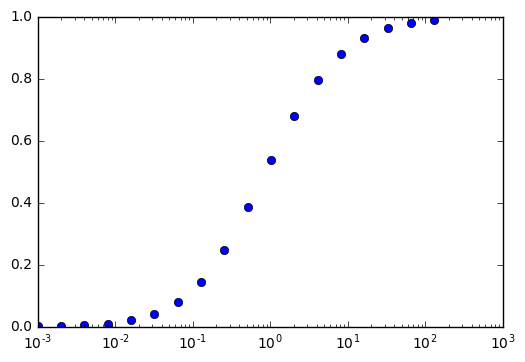

In [8]:
plt.semilogx(ligs,nubar,'o')

In [11]:
np.random.seed(16456)
nubar_gauss = [np.random.normal(1.0,0.063,18)*nubar for i in range(5)]

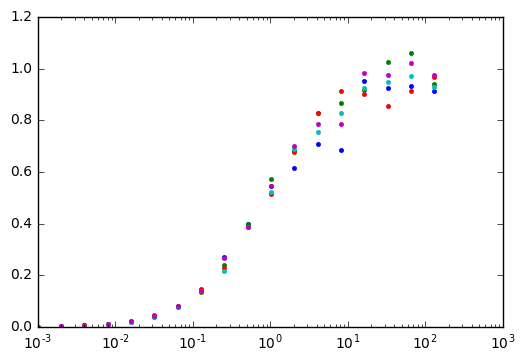

In [22]:
for i in range(len(nubar_gauss)):
    plt.semilogx(ligs,nubar_gauss[i],'.')

In [20]:
nubar_gauss_means = np.sum(nubar_gauss,0)/5

In [39]:
np.average(nubar_gauss,0)

array([ 0.00137504,  0.00273319,  0.00534502,  0.0105298 ,  0.02065941,
        0.04080431,  0.08007698,  0.14096649,  0.24402609,  0.3915636 ,
        0.54025601,  0.67255809,  0.78031043,  0.81615235,  0.93507448,
        0.94414092,  0.9794484 ,  0.94465181])

In [30]:
np.std(np.std(nubar_gauss, 0) / nubar_gauss_means)

0.022454065580370615

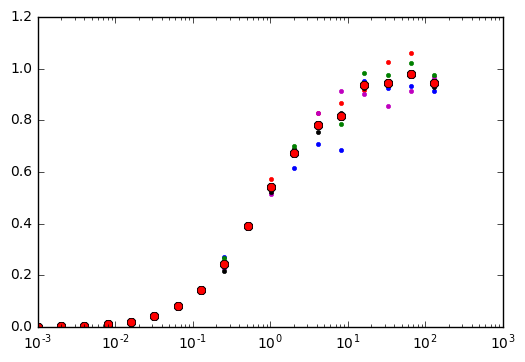

In [24]:
for i in range(len(nubar_gauss)):
    plt.semilogx(ligs,nubar_gauss[i],'.')
    plt.semilogx(ligs,nubar_gauss_means,'o')

In [36]:
a = np.random.normal(0.05,0.025,10000)

(array([   36.,   221.,   796.,  2016.,  2819.,  2439.,  1222.,   379.,
           66.,     6.]),
 array([-0.03593812, -0.01758553,  0.00076705,  0.01911963,  0.03747222,
         0.0558248 ,  0.07417738,  0.09252997,  0.11088255,  0.12923513,
         0.14758772]),
 <a list of 10 Patch objects>)

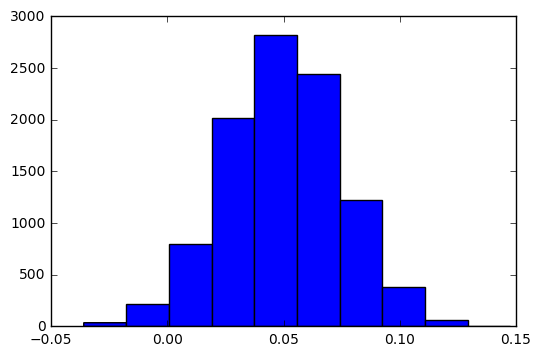

In [37]:
plt.hist(a)

(array([  703.,  1300.,  2060.,  2316.,  1908.,  1107.,   447.,   124.,
           32.,     3.]),
 array([  2.21032598e-05,   1.47786647e-02,   2.95352262e-02,
          4.42917877e-02,   5.90483491e-02,   7.38049106e-02,
          8.85614720e-02,   1.03318034e-01,   1.18074595e-01,
          1.32831156e-01,   1.47587718e-01]),
 <a list of 10 Patch objects>)

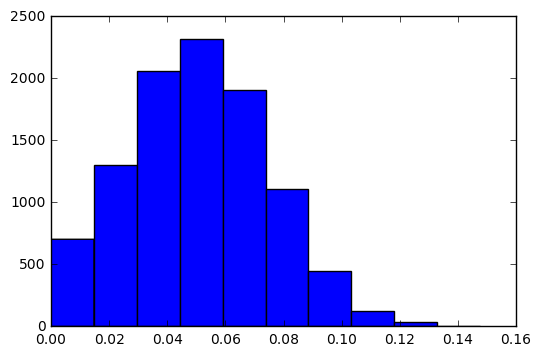

In [38]:
plt.hist(np.abs(a))

In [45]:
np.average((nubar_gauss - nubar),0) / np.average(nubar_gauss,0)

array([ 0.00408423, -0.00041799, -0.01976386, -0.02851028, -0.03490834,
       -0.02164324,  0.00844655, -0.02903974, -0.01525564,  0.01618367,
        0.00401937, -0.01184873, -0.01979605, -0.07666819,  0.0028852 ,
       -0.02101079, -0.00194849, -0.04854346])

In [54]:
nubar_gauss_sigma = np.sqrt(np.sum((nubar_gauss - nubar_gauss_means)**2,0) / 5)

In [56]:
np.average(nubar_gauss_sigma/nubar_gauss_means)

0.052571494609949559

In [58]:
np.random.seed(1602)
hold_updn = []
for i in range(5):
    a = np.random.randn(18)
    updn = a/np.abs(a)
    hold_updn.append(updn)

In [59]:
np.random.seed(1603)
hold_unoise = []
for i in range(5):
    hold_unoise.append(0.025 + 0.05*np.random.rand(18))

In [62]:
hold_unoise

[array([ 0.06047461,  0.04034714,  0.03622939,  0.07490481,  0.0426322 ,
         0.0674276 ,  0.02553976,  0.04113675,  0.04989821,  0.04096645,
         0.03246647,  0.02744356,  0.06970361,  0.06202768,  0.05376256,
         0.07456417,  0.07155491,  0.02613595]),
 array([ 0.06435542,  0.03675238,  0.06650319,  0.05349615,  0.04053918,
         0.05588583,  0.07357066,  0.04957818,  0.03550904,  0.05669023,
         0.02796686,  0.03457951,  0.05486126,  0.02896174,  0.06947835,
         0.07263172,  0.04617353,  0.03138186]),
 array([ 0.04736269,  0.02816844,  0.06164147,  0.05726298,  0.07347317,
         0.06781032,  0.03300889,  0.06975309,  0.05267051,  0.05682791,
         0.06506928,  0.02644145,  0.06595481,  0.06286733,  0.05759318,
         0.06667028,  0.04918872,  0.07181953]),
 array([ 0.06300509,  0.06791077,  0.05543984,  0.05827004,  0.03210826,
         0.02937496,  0.06170463,  0.05595037,  0.06096735,  0.05858292,
         0.04936126,  0.03907952,  0.06436533,  0.

In [63]:
unar = np.array(hold_unoise)

In [64]:
updar = np.array(hold_updn)

In [65]:
nubar_uni = (unar*updar*nubar + nubar)

In [66]:
nubar_uni

array([[ 0.00128661,  0.00262401,  0.00564813,  0.01164123,  0.0204691 ,
         0.04449833,  0.08142847,  0.15102742,  0.26011109,  0.40100803,
         0.55555423,  0.66185097,  0.74029033,  0.82421999,  0.98250356,
         0.89209984,  1.05157775,  0.9646206 ],
       [ 0.0012813 ,  0.00263384,  0.00581314,  0.01140938,  0.02224735,
         0.04401718,  0.07355905,  0.1378683 ,  0.25654619,  0.36338808,
         0.52303599,  0.65699476,  0.75210124,  0.85327586,  0.86759663,
         1.03399346,  0.93604414,  0.95942448],
       [ 0.00130457,  0.00265731,  0.00578664,  0.01020985,  0.0229515 ,
         0.04451429,  0.08202153,  0.13494173,  0.23469981,  0.40711829,
         0.50307175,  0.66253293,  0.84824153,  0.82348216,  0.87867808,
         1.02824676,  1.02962854,  0.91937063],
       [ 0.00145571,  0.00292002,  0.00575284,  0.01019895,  0.0206941 ,
         0.04291201,  0.07450122,  0.15317629,  0.26285346,  0.36265896,
         0.51152399,  0.65393238,  0.84697669,  0.910

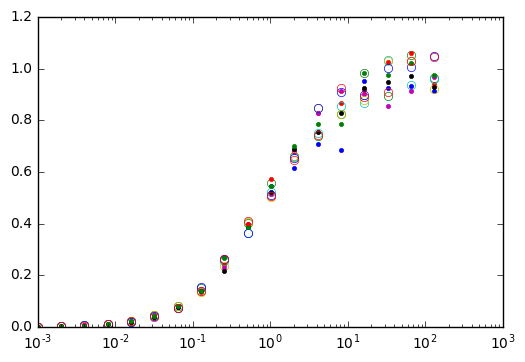

In [71]:
for i in range(5):
    plt.semilogx(ligs,nubar_gauss[i],'.')
    plt.semilogx(ligs,nubar_uni[i],'o',fillstyle='none')

In [72]:
nubar_uni_means = np.average(nubar_uni,0)

In [73]:
nubar_uni_means

array([ 0.0013261 ,  0.00267899,  0.0056098 ,  0.01075818,  0.02183342,
        0.04292878,  0.07722736,  0.14327556,  0.25534295,  0.38875722,
        0.51990647,  0.65593261,  0.7860921 ,  0.86761624,  0.90330637,
        0.97273404,  1.01018503,  0.98694822])

In [74]:
nubar_gauss_means

array([ 0.00137504,  0.00273319,  0.00534502,  0.0105298 ,  0.02065941,
        0.04080431,  0.08007698,  0.14096649,  0.24402609,  0.3915636 ,
        0.54025601,  0.67255809,  0.78031043,  0.81615235,  0.93507448,
        0.94414092,  0.9794484 ,  0.94465181])

In [75]:
nubar_uni_sigma = np.sqrt(np.sum((nubar_uni - nubar_uni_means)**2,0) / 5)

In [76]:
nubar_uni_sigma

array([  6.54148331e-05,   1.24776543e-04,   2.86322582e-04,
         6.32346985e-04,   1.05118613e-03,   2.19213545e-03,
         3.69556405e-03,   7.37708558e-03,   1.05642200e-02,
         2.11984696e-02,   1.90688523e-02,   6.60046789e-03,
         5.03834968e-02,   4.32226129e-02,   4.09382313e-02,
         6.03771306e-02,   3.97678903e-02,   5.04470062e-02])

In [77]:
np.average(nubar_uni_sigma/nubar_uni_means)

0.047705497949022672

In [80]:
np.std(nubar_uni_sigma/nubar_uni_means)

0.011437998381148274

In [79]:
np.average(nubar_gauss_sigma/nubar_gauss_means)

0.052571494609949559

In [81]:
np.std(nubar_gauss_sigma/nubar_gauss_means)

0.022454065580370615

In [82]:
0.05/np.sqrt(12)

0.014433756729740645

In [83]:
0.685*0.05

0.03425

In [85]:
normnoise = np.random.normal(1.0,0.05,10000)

In [87]:
np.sqrt(np.sum((normnoise-1)**2)/10000)

0.050148854645716973

In [88]:
np.average(normnoise)

0.99945125844922589

In [101]:
np.random.seed(1776)
nubar_test = np.array([np.random.normal(1.0,0.05,18)*nubar for i in range(10000)])

In [102]:
nubar_test_mean = np.average(nubar_test,0)

In [103]:
nubar_test_sigma = np.sqrt(np.sum((nubar_test - nubar_test_mean)**2,0)/10000)

In [104]:
np.average(nubar_test_sigma/nubar_test_mean)

0.049839751464806445

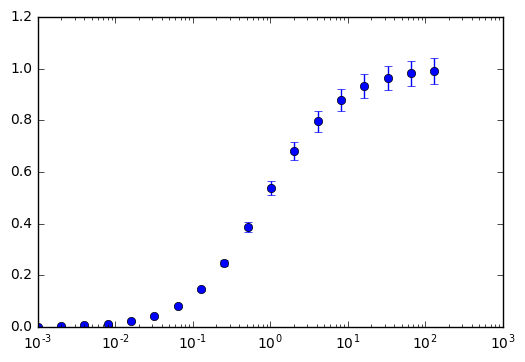

In [105]:
plt.errorbar(ligs, nubar_test_mean, yerr=nubar_test_sigma, linestyle='', marker='o')
plt.xscale('log')